## This notebook provides script for analysing scaffolds from different sets and justifies the similarities and divergence with statistical significance
* Multple statistical tests were involved in supporting the significance of the variance with isoforms
* i have used the script to identify what level of variance does the molecules within each set and among the three sets exists and its significance level.

## Below code takes a dataframe with smiles ids column and its corresponding labels column and calculates
* Murko scaffolds for each dataset
* Calculates the fingerprint for them using RDKit libarary
* Calculates two principle components for each set and plots the molecules of each set within the same plot using PCA, t-SNE and UMAP methods
* saves the images as .png format

[17:05:36] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:36] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:36] Explicit valence for atom # 24 N, 4, is greater than permitted
[17:05:36] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:36] SMILES Parse Error: extra open parentheses for input: 'C[C@@H]1O[C@@H](O[C@H]2[C@H](OC(=O)[C@]34CCC(C)(C)C[C@H]3C3=CC[C@@H]5[C@@]6(C)C[C@H](O)[C@H](O[C@@H]7O[C@H](CO)[C@@H](O)[C@H](O)[C@H]7O)[C@](C)([C@@H]6CC[C@@]5(C)[C@]3(C)CC4)C(O)=O)O[C@@H](C)[C@H](OC(C)'
[17:05:36] Explicit valence for atom # 24 N, 4, is greater than permitted
[17:05:36] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:37] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:37] Explicit valence for atom # 25 N, 4, is greater than permitted
[17:05:37] Explicit valence for atom # 24 N, 4, is greater than permitted
[17:05:37] Explicit valence for atom # 25 N, 4, is greater than 

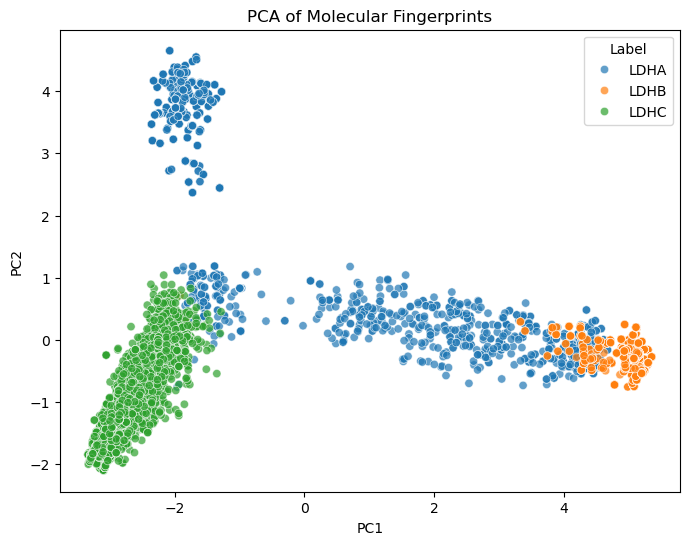

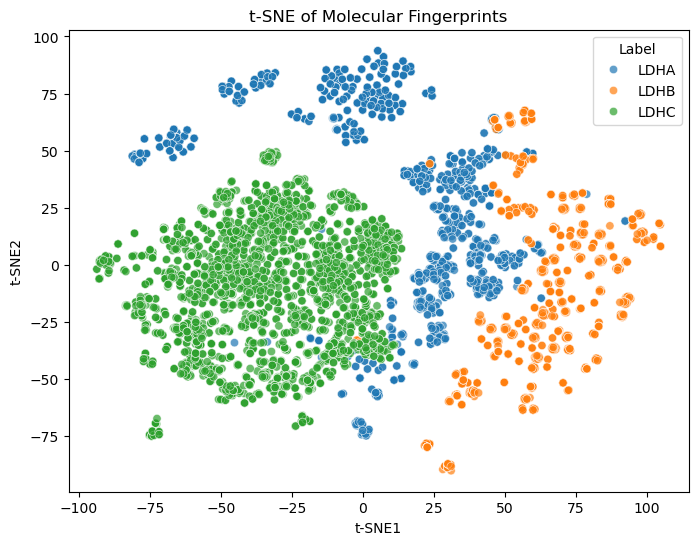

/home/anush/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/anush/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[5.88808356e-14 7.25699909e-08 3.32918426e-06 2.41307859e-06]
not reaching the requested tolerance 6.854534149169922e-07.
Use iteration 1775 instead with accuracy 
5.067986603390568e-07.

  _, diffusion_map = lobpcg(
/home/anush/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[6.98980814e-14 6.60464291e-08 1.02247078e-06 9.38731717e-07]
not reaching the requested tolerance 6.854534149169922e-07.
  _, diffusion_map = lobpcg(


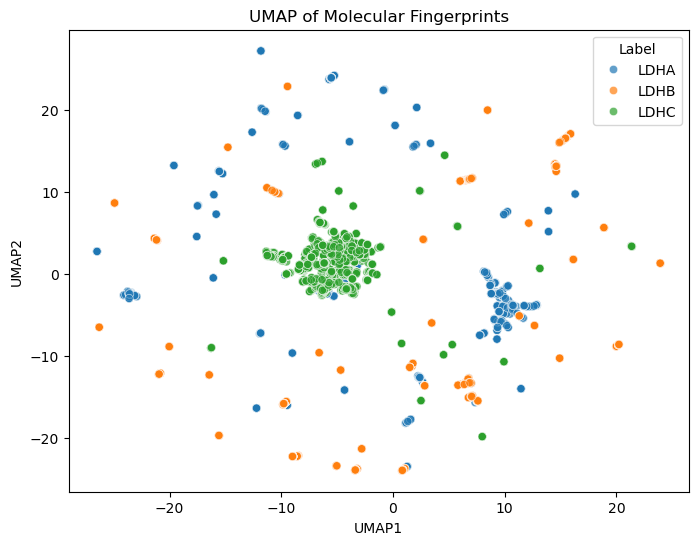

Scaffold Distribution for LDHA:
LDHA
O=C1CC(c2ccccc2)CC=C1Sc1ccccc1                               254
c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2CC2CC2)cc1      94
O=C1OC(c2ccccc2)CC=C1Sc1ccccc1                                88
c1ccc(Cc2c(-c3ccccc3)nn(-c3nccs3)c2CC2CC2)cc1                 51
c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2C2CC2)cc1       44
c1ccc(Cc2cn(-c3nccs3)nc2-c2cccc(-c3ccccc3)c2)cc1              37
C(#Cc1cccs1)c1cccc(-c2nn(-c3nccs3)c(CC3CC3)c2Cc2ccccc2)c1     33
O=C1CC(c2ccccc2)CC=C1SCc1ccccc1                               32
c1ccc(Cc2cn(-c3nccs3)nc2-c2ccccc2)cc1                         32
O=C1C=CCC(c2ccccc2)C1                                         32
Name: count, dtype: int64
Scaffold Distribution for LDHB:
LDHB
c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2CC2CC2)cc1            606
c1ccc(Cc2c(-c3ccccc3)nn(-c3nccs3)c2CC2CC2)cc1                       124
C1=C(c2cccc(-c3nn(-c4nccs4)c(CC4CC4)c3Cc3ccccc3)c2)CCCC1             61
c1ccc(Cc2c(-c3cccc(C4CC4c4cccs4)c3

In [56]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, rdFingerprintGenerator
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit import DataStructs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
import umap
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint

# Load your DataFrame (Assumed format)
df = pd.read_csv("LDH.csv")

# Function to get Murcko scaffold
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        return Chem.MolToSmiles(scaffold)
    return None

# Extract scaffolds for each set
def extract_scaffolds(df):
    scaffolds = {}
    for col in df.columns:
        scaffolds[col] = df[col].dropna().apply(get_scaffold)
    return pd.DataFrame(scaffolds)

# Compute Scaffold Frequency
def scaffold_distribution(df):
    scaffold_counts = {}
    for col in df.columns:
        scaffold_counts[col] = df[col].value_counts()
    return scaffold_counts

# Function to compute fingerprint similarity
def compute_fingerprint_similarity(df, fp_type='Morgan'):
    fingerprints = {}
    for col in df.columns:
        mols = df[col].dropna().apply(Chem.MolFromSmiles)
        if fp_type == 'Morgan':
            fingerprints[col] = [GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols if mol]
        elif fp_type == 'MACCS':
            fingerprints[col] = [GetMACCSKeysFingerprint(mol) for mol in mols if mol]
    return fingerprints


def plot_pca(fingerprints):
    combined_fps = []
    labels = []
    for col, fps in fingerprints.items():
        for fp in fps:
            arr = np.zeros((1024,))  # Ensure 1D vector of size 1024
            DataStructs.ConvertToNumpyArray(fp, arr)
            combined_fps.append(arr)
            labels.append(col)

    # Convert to 2D NumPy array
    combined_fps = np.vstack(combined_fps)  # Stacks correctly into (num_samples, 1024)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(combined_fps)

    df_pca = pd.DataFrame({'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'Label': labels})
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Label', alpha=0.7)
    plt.title("PCA of Molecular Fingerprints")
    plt.savefig('PCA.png', dpi = 600)
    plt.show()


def plot_tsne(fingerprints):
    combined_fps = []
    labels = []
    for col, fps in fingerprints.items():
        for fp in fps:
            arr = np.zeros((1024,))  # Ensure a 1D vector of size 1024
            DataStructs.ConvertToNumpyArray(fp, arr)
            combined_fps.append(arr)
            labels.append(col)

    # Convert to a 2D NumPy array
    combined_fps = np.vstack(combined_fps)  # Stacks correctly into (num_samples, 1024)

    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_result = tsne.fit_transform(combined_fps)

    df_tsne = pd.DataFrame({'t-SNE1': tsne_result[:, 0], 't-SNE2': tsne_result[:, 1], 'Label': labels})
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_tsne, x='t-SNE1', y='t-SNE2', hue='Label', alpha=0.7)
    plt.title("t-SNE of Molecular Fingerprints")
    plt.savefig('t-SNE.png', dpi = 600)
    plt.show()


def plot_umap(fingerprints):
    combined_fps = []
    labels = []
    for col, fps in fingerprints.items():
        for fp in fps:
            arr = np.zeros((1024,))  # Ensure a 1D vector of size 1024
            DataStructs.ConvertToNumpyArray(fp, arr)
            combined_fps.append(arr)
            labels.append(col)

    # Convert list of 1D arrays into a 2D NumPy array
    combined_fps = np.vstack(combined_fps)  

    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(combined_fps)

    df_umap = pd.DataFrame({'UMAP1': umap_result[:, 0], 'UMAP2': umap_result[:, 1], 'Label': labels})

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Label', alpha=0.7)
    plt.title("UMAP of Molecular Fingerprints")
    plt.savefig('UMAP.png', dpi = 600)
    plt.show()


# Execute all analyses
scaffold_df = extract_scaffolds(df)
scaffold_counts = scaffold_distribution(scaffold_df)
fingerprints = compute_fingerprint_similarity(df, fp_type='Morgan')

plot_pca(fingerprints)
plot_tsne(fingerprints)
plot_umap(fingerprints)

# Print scaffold frequency
for key, value in scaffold_counts.items():
    print(f"Scaffold Distribution for {key}:")
    print(value.head(10))

## Below code takes a dataframe with smiles ids column in it and retreives the scaffolds of each set of molecules existing.

# Note that from here the code snippets in each cell exist in a continued fashion, which means the objects defined in a cell are used in another cell.

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter

# Load your DataFrame (assuming it has columns: 'LDHA', 'LDHB', 'LDHC')
df = pd.read_csv("LDH_deduplicated.csv")  # Update with actual file name

def extract_scaffolds(smiles_list):
    """
    Extract Murcko scaffolds from a list of SMILES.
    """
    scaffolds = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            scaffold = MurckoScaffold.GetScaffoldForMol(mol)
            scaffold_smiles = Chem.MolToSmiles(scaffold)
            if scaffold_smiles:  # Check if the scaffold is not empty
                scaffolds.append(scaffold_smiles)  # Convert to SMILES format
    return Counter(scaffolds)  # Return scaffold frequency count

# Extract scaffolds for each molecular set
scaffold_counts_LDHA = extract_scaffolds(df['LDHA'].dropna().tolist())
scaffold_counts_LDHB = extract_scaffolds(df['LDHB'].dropna().tolist())
scaffold_counts_LDHC = extract_scaffolds(df['LDHC'].dropna().tolist())

# Print unique scaffold counts for each set
print(f"Unique Scaffolds in LDHA: {len(scaffold_counts_LDHA)}")
print(f"Unique Scaffolds in LDHB: {len(scaffold_counts_LDHB)}")
print(f"Unique Scaffolds in LDHC: {len(scaffold_counts_LDHC)}")

## Below code can be use to save the images of the scaffolds obtained form the previous code in .png format

Visualizing top 5 scaffolds for: LDHA


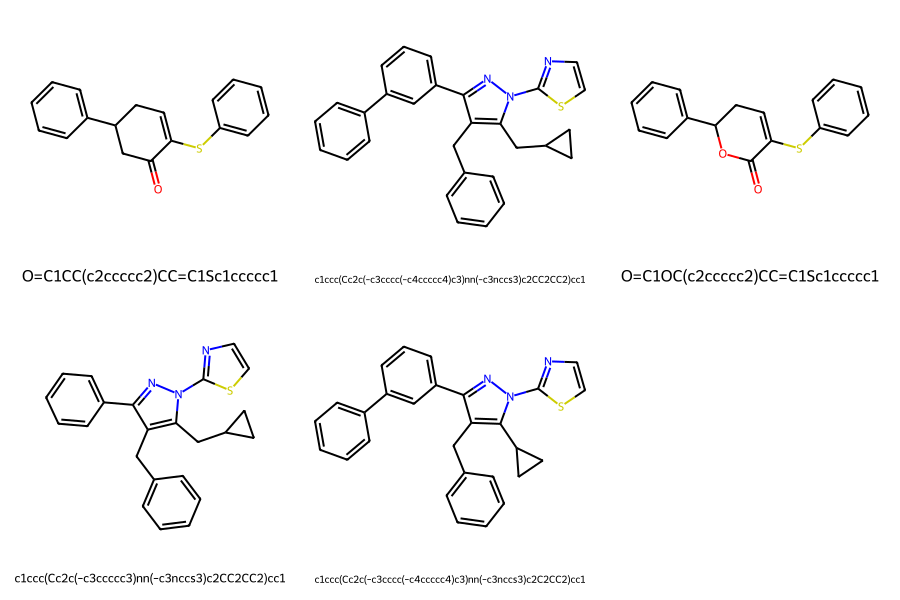

Visualizing top 5 scaffolds for: LDHB


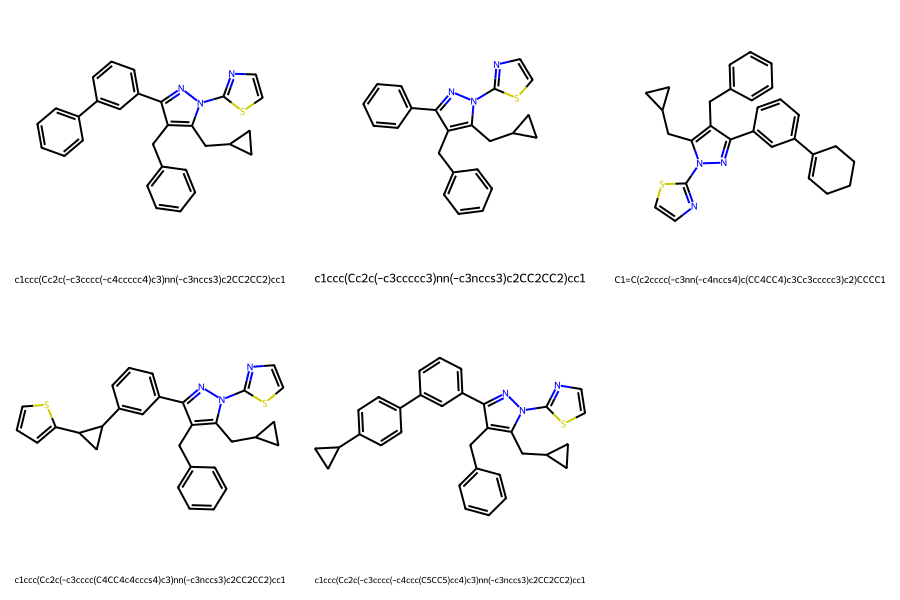

Visualizing top 5 scaffolds for: LDHC


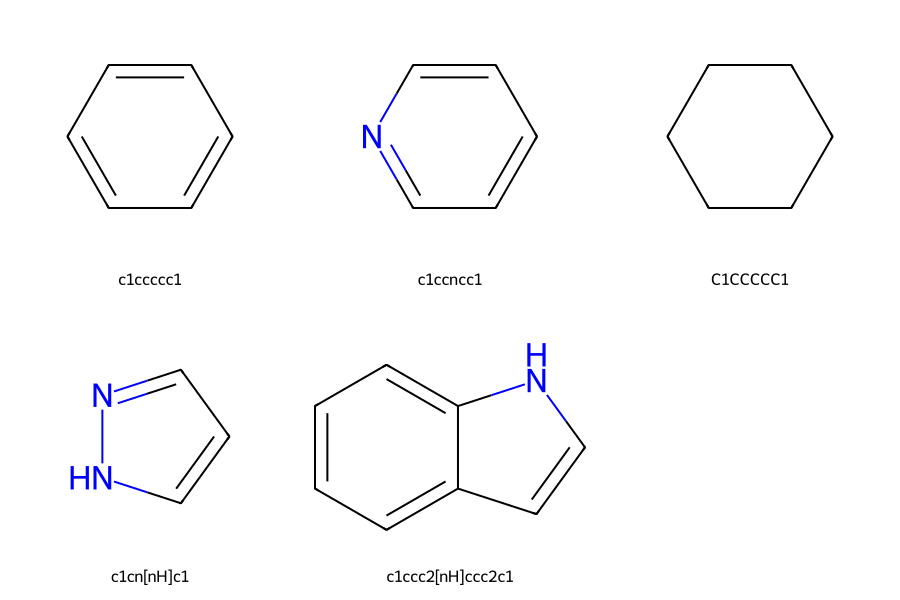

In [40]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from collections import defaultdict

def visualize_scaffolds(scaffold_distributions, n_to_visualize=5):
    """
    Visualizes the top N scaffolds from each distribution using RDKit.

    Args:
        scaffold_distributions (dict): A dictionary where keys are distribution names
                                         (e.g., 'LDHA', 'LDHB', 'LDHC') and values are pandas Series
                                         representing scaffold distributions.
        n_to_visualize (int): Number of top scaffolds to visualize per distribution.
    """

    for name, distribution in scaffold_distributions.items():
        print(f"Visualizing top {n_to_visualize} scaffolds for: {name}")
        scaffolds = distribution.index[:n_to_visualize]  # Get top N scaffolds

        # remove the "None" scaffold if it exists
        scaffolds = [s for s in scaffolds if isinstance(s, str)]

        mols = [Chem.MolFromSmiles(s) for s in scaffolds]
        
        # Remove None molecules (invalid SMILES)
        mols = [m for m in mols if m is not None]

        # Prepare the drawing
        img = Draw.MolsToGridImage(mols, 
                                    legends=[s for s in scaffolds if Chem.MolFromSmiles(s) is not None], 
                                    molsPerRow=min(n_to_visualize, 3), 
                                    subImgSize=(300, 300))
        #img.save(f"{name}_top_{n_to_visualize}_scaffolds.png") # save as a png
        display(img) # display in notebook if in use

# Your data:
scaffold_distributions = {
    "LDHA": pd.Series({
        "O=C1CC(c2ccccc2)CC=C1Sc1ccccc1": 254,
        "c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 94,
        "O=C1OC(c2ccccc2)CC=C1Sc1ccccc1": 88,
        "c1ccc(Cc2c(-c3ccccc3)nn(-c3nccs3)c2CC2CC2)cc1": 51,
        "c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2C2CC2)cc1": 44,
        "c1ccc(Cc2cn(-c3nccs3)nc2-c2cccc(-c3ccccc3)c2)cc1": 37,
        "C(#Cc1cccs1)c1cccc(-c2nn(-c3nccs3)c(CC3CC3)c2Cc2ccccc2)c1": 33,
        "O=C1CC(c2ccccc2)CC=C1SCc1ccccc1": 32,
        "c1ccc(Cc2cn(-c3nccs3)nc2-c2ccccc2)cc1": 32,
        "O=C1C=CCC(c2ccccc2)C1": 32
    }),
    "LDHB": pd.Series({
        "c1ccc(Cc2c(-c3cccc(-c4ccccc4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 606,
        "c1ccc(Cc2c(-c3ccccc3)nn(-c3nccs3)c2CC2CC2)cc1": 124,
        "C1=C(c2cccc(-c3nn(-c4nccs4)c(CC4CC4)c3Cc3ccccc3)c2)CCCC1": 61,
        "c1ccc(Cc2c(-c3cccc(C4CC4c4cccs4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 36,
        "c1ccc(Cc2c(-c3cccc(-c4ccc(C5CC5)cc4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 32,
        "c1ccc(Cc2c(-c3cccc(C4CC(c5cccs5)C4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 28,
        "c1ccc(Cc2c(-c3cccc(-c4ccc5c(c4)CCC5)c3)nn(-c3nccs3)c2CC2CC2)cc1": 27,
        "c1ccc(Cc2c(-c3cccc(-c4cccs4)c3)nn(-c3nccs3)c2CC2CC2)cc1": 26,
        "c1ccc(Cc2c(-c3cccc(-c4ccc5c(c4)CCCC5)c3)nn(-c3nccs3)c2CC2CC2)cc1": 26,
        "C(#Cc1cccs1)c1cccc(-c2nn(-c3nccs3)c(CC3CC3)c2Cc2ccccc2)c1": 22
    }),
    "LDHC": pd.Series({
        "c1ccccc1": 498,
        "c1ccncc1": 46,
        "C1CCCCC1": 28,
        "c1cn[nH]c1": 23,
        "c1ccc2[nH]ccc2c1": 23,
        "c1ccsc1": 22,
        "C1CCNC1": 20,
        "c1c[nH]cn1": 20,
        "C1CCNCC1": 19
    })
}

import pandas as pd
from IPython.display import display

visualize_scaffolds(scaffold_distributions, n_to_visualize=5)


# To calculate the scaffold similarity for all the isoforms exist. 

# Interpretation:
* A higher similarity score means less scaffold diversity.
* A lower similarity score means more diverse scaffolds.

In [ ]:
from rdkit.Chem import AllChem
from rdkit.DataStructs import BulkTanimotoSimilarity
import numpy as np

def get_morgan_fps(scaffold_dict, radius=2, nBits=1024):
    """
    Convert scaffolds to Morgan fingerprints.
    """
    return [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius, nBits) 
            for smi in scaffold_dict.keys() if Chem.MolFromSmiles(smi) is not None]

# Generate fingerprints for each set
fps_LDHA = get_morgan_fps(scaffold_counts_LDHA)
fps_LDHB = get_morgan_fps(scaffold_counts_LDHB)
fps_LDHC = get_morgan_fps(scaffold_counts_LDHC)

# Function to compute average pairwise Tanimoto similarity
def avg_tanimoto(fps):
    sims = []
    for i in range(len(fps)):
        sims.extend(BulkTanimotoSimilarity(fps[i], fps))
    return np.mean(sims) if sims else 0  # Avoid division by zero

# Compute similarity scores
sim_LDHA = avg_tanimoto(fps_LDHA)
sim_LDHB = avg_tanimoto(fps_LDHB)
sim_LDHC = avg_tanimoto(fps_LDHC)

# Print results
print(f"LDHA Scaffold Similarity: {sim_LDHA:.4f}")
print(f"LDHB Scaffold Similarity: {sim_LDHB:.4f}")
print(f"LDHC Scaffold Similarity: {sim_LDHC:.4f}")


## To identify the scaffold similarties within the groups as an average value, use the below code

Interpretation:

    High cross-group similarity → Molecules share many scaffolds across datasets.
    Low cross-group similarity → Molecules in different datasets have distinct scaffolds.

In [ ]:
def avg_cross_tanimoto(fps1, fps2):
    """
    Compute average Tanimoto similarity between two sets of scaffolds.
    """
    sims = []
    for fp in fps1:
        sims.extend(BulkTanimotoSimilarity(fp, fps2))
    return np.mean(sims) if sims else 0

# Compute cross-group similarities
sim_LDHA_LDHB = avg_cross_tanimoto(fps_LDHA, fps_LDHB)
sim_LDHA_LDHC = avg_cross_tanimoto(fps_LDHA, fps_LDHC)
sim_LDHB_LDHC = avg_cross_tanimoto(fps_LDHB, fps_LDHC)

# Print cross-group similarities
print(f"LDHA vs LDHB Scaffold Similarity: {sim_LDHA_LDHB:.4f}")
print(f"LDHA vs LDHC Scaffold Similarity: {sim_LDHA_LDHC:.4f}")
print(f"LDHB vs LDHC Scaffold Similarity: {sim_LDHB_LDHC:.4f}")


# Below code is utilised to calculate the jaccard similarity values

Interpretation:

    Low Jaccard similarity (near 0) → Highly diverse scaffolds between datasets.
    High Jaccard similarity (near 1) → Significant scaffold overlap between datasets.

In [ ]:
def jaccard_similarity(set1, set2):
    """
    Compute Jaccard similarity index between two sets of scaffolds.
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union else 0

# Convert scaffold dictionaries to sets
scaffold_set_LDHA = set(scaffold_counts_LDHA.keys())
scaffold_set_LDHB = set(scaffold_counts_LDHB.keys())
scaffold_set_LDHC = set(scaffold_counts_LDHC.keys())

# Compute Jaccard similarity between scaffold sets
jaccard_LDHA_LDHB = jaccard_similarity(scaffold_set_LDHA, scaffold_set_LDHB)
jaccard_LDHA_LDHC = jaccard_similarity(scaffold_set_LDHA, scaffold_set_LDHC)
jaccard_LDHB_LDHC = jaccard_similarity(scaffold_set_LDHB, scaffold_set_LDHC)

# Print results
print(f"Jaccard Similarity (LDHA vs LDHB): {jaccard_LDHA_LDHB:.4f}")
print(f"Jaccard Similarity (LDHA vs LDHC): {jaccard_LDHA_LDHC:.4f}")
print(f"Jaccard Similarity (LDHB vs LDHC): {jaccard_LDHB_LDHC:.4f}")


# Below code is used to plot barplots for the most frequently repeating scaffolds within each set.
* x axis represents count and y axis represents the scaffolds

In [ ]:
import matplotlib.pyplot as plt

def plot_top_scaffolds(scaffold_counts, title):
    """
    Plots the frequency distribution of the top 10 scaffolds.
    """
    top_scaffolds = scaffold_counts.most_common(10)
    scaffolds, counts = zip(*top_scaffolds)

    plt.figure(figsize=(10, 5))
    plt.barh(scaffolds, counts, color='skyblue')
    plt.xlabel("Count")
    plt.ylabel("Scaffold SMILES")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot top 10 scaffolds for each dataset
plot_top_scaffolds(scaffold_counts_LDHA, "Top 10 Scaffolds in LDHA")
plot_top_scaffolds(scaffold_counts_LDHB, "Top 10 Scaffolds in LDHB")
plot_top_scaffolds(scaffold_counts_LDHC, "Top 10 Scaffolds in LDHC")


# Below code is to calculate the average scaffold diversity score of each isoform

Pairwise Scaffold Diversity (Internal Diversity Score)

Interpretation:

    Higher diversity score → Scaffolds are more structurally diverse.
    Lower diversity score → Dataset contains many similar scaffolds.

In [ ]:
def avg_pairwise_similarity(fps):
    """
    Compute the average pairwise Tanimoto similarity within a dataset.
    """
    sims = []
    for i in range(len(fps)):
        sims.extend(BulkTanimotoSimilarity(fps[i], fps))
    return np.mean(sims) if sims else 0

# Compute internal diversity scores
diversity_LDHA = 1 - avg_pairwise_similarity(fps_LDHA)
diversity_LDHB = 1 - avg_pairwise_similarity(fps_LDHB)
diversity_LDHC = 1 - avg_pairwise_similarity(fps_LDHC)

# Print results
print(f"Scaffold Diversity Score (LDHA): {diversity_LDHA:.4f}")
print(f"Scaffold Diversity Score (LDHB): {diversity_LDHB:.4f}")
print(f"Scaffold Diversity Score (LDHC): {diversity_LDHC:.4f}")


# To perform heirarchial clustering for each isoform and save the images below code can be employed

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_scaffold_clustering(fps, labels, title):
    """
    Perform hierarchical clustering and plot a dendrogram.
    """
    linkage_matrix = linkage(fps, method='ward')
    
    plt.figure(figsize=(50, 10))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, leaf_font_size=8)
    plt.title(title)
    plt.savefig(f'{title}.png', dpi = 600)
    plt.tight_layout()
    plt.show()

# Perform hierarchical clustering for each dataset
plot_scaffold_clustering(fps_LDHA, list(scaffold_counts_LDHA.keys()), "LDHA Scaffold Clustering")
plot_scaffold_clustering(fps_LDHB, list(scaffold_counts_LDHB.keys()), "LDHB Scaffold Clustering")
plot_scaffold_clustering(fps_LDHC, list(scaffold_counts_LDHC.keys()), "LDHC Scaffold Clustering")


Final Summary: 
Metric	                       Method	                            Interpretation
Scaffold Overlap	           Jaccard Index	                    Measures shared scaffolds between groups
Scaffold Enrichment	           Top scaffold frequency	            Identifies scaffold bias
Internal Diversity	           Pairwise Tanimoto similarity	        Measures scaffold variation within datasets
Hierarchical Clustering	       Dendrograms	                        Identifies scaffold relationships
Structural Variation	       PCA on scaffolds	                    Visualizes scaffold diversity

# To perform ANOVA calculations and see the significance of the divergence please use the below code

In [ ]:
from scipy.stats import f_oneway

# Generate similarity scores within each dataset
similarities_LDHA = [BulkTanimotoSimilarity(fp, fps_LDHA) for fp in fps_LDHA]
similarities_LDHB = [BulkTanimotoSimilarity(fp, fps_LDHB) for fp in fps_LDHB]
similarities_LDHC = [BulkTanimotoSimilarity(fp, fps_LDHC) for fp in fps_LDHC]

# Flatten lists and remove self-comparisons
similarities_LDHA = [score for sublist in similarities_LDHA for score in sublist if score < 1]
similarities_LDHB = [score for sublist in similarities_LDHB for score in sublist if score < 1]
similarities_LDHC = [score for sublist in similarities_LDHC for score in sublist if score < 1]

# Perform ANOVA
anova_result = f_oneway(similarities_LDHA, similarities_LDHB, similarities_LDHC)

# Print results
print(f"ANOVA Results: F = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.6f}")


# Below code is to perform permutations test, which is used to prove that the results obtained are statistically significant and not by chance

In [ ]:
import numpy as np

def permutation_test(group1, group2, num_permutations=1000):
    """
    Perform permutation test to compare similarity distributions of two scaffold sets.
    """
    observed_diff = abs(np.mean(group1) - np.mean(group2))
    combined = np.array(group1 + group2)

    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_group1, new_group2 = combined[:len(group1)], combined[len(group1):]
        new_diff = abs(np.mean(new_group1) - np.mean(new_group2))
        if new_diff >= observed_diff:
            count += 1

    return count / num_permutations

# Perform pairwise permutation tests
perm_LDHA_LDHB = permutation_test(similarities_LDHA, similarities_LDHB)
perm_LDHA_LDHC = permutation_test(similarities_LDHA, similarities_LDHC)
perm_LDHB_LDHC = permutation_test(similarities_LDHB, similarities_LDHC)

# Print results
print(f"Permutation Test (LDHA vs LDHB): p-value = {perm_LDHA_LDHB:.6f}")
print(f"Permutation Test (LDHA vs LDHC): p-value = {perm_LDHA_LDHC:.6f}")
print(f"Permutation Test (LDHB vs LDHC): p-value = {perm_LDHB_LDHC:.6f}")


# To extract scaffolds and save them as a dataframe

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter



# Extract SMILES lists from each dataset
smiles_LDHA = df['LDHA'].dropna().tolist()
smiles_LDHB = df['LDHB'].dropna().tolist()
smiles_LDHC = df['LDHC'].dropna().tolist()

def get_scaffold_counts(smiles_list):
    """
    Extract and count Murcko scaffolds from a list of SMILES.
    """
    scaffolds = []
    for smile in smiles_list:
        mol = Chem.MolFromSmiles(smile)
        if mol:
            scaffold = MurckoScaffold.MurckoScaffoldSmiles(mol=mol)
            scaffolds.append(scaffold)
    
    return Counter(scaffolds)

# Get scaffold frequencies
scaffold_counts_LDHA = get_scaffold_counts(smiles_LDHA)
scaffold_counts_LDHB = get_scaffold_counts(smiles_LDHB)
scaffold_counts_LDHC = get_scaffold_counts(smiles_LDHC)

# Convert to DataFrame
df_scaffolds = pd.DataFrame({
    "LDHA": scaffold_counts_LDHA,
    "LDHB": scaffold_counts_LDHB,
    "LDHC": scaffold_counts_LDHC
}).fillna(0)

# Normalize by total counts
df_scaffolds = df_scaffolds.div(df_scaffolds.sum(axis=0), axis=1)

# Print scaffold frequency table
print(df_scaffolds.head(10))
df_scaffolds.to_excel('scaffolds_of_the_molecules.xlsx')

# Below code is to plot a scaffold frequency distribution heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_scaffolds, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".2f")
plt.title("Normalized Scaffold Frequency Distribution")
plt.xlabel("Scaffold SMILES")
plt.ylabel("Molecule Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Normalised_scaffold_frequency_distribution.png', dpi = 600)
plt.show()


# Below code is the same code as above with slight modificatinos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot heatmap with improved aesthetics
plt.figure(figsize=(14, 7))
ax = sns.heatmap(
    df_scaffolds, 
    cmap="mako",  # Try "viridis", "magma", or "coolwarm" as alternatives
    linewidths=0.7, 
    linecolor="gray",
    annot=True, 
    fmt=".2f", 
    annot_kws={"size": 8},  # Adjust annotation font size
    cbar_kws={"shrink": 0.8, "aspect": 20},  # Adjust color bar size
)

# Customizing title and labels
plt.title("Normalized Scaffold Frequency Distribution", fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Scaffold SMILES", fontsize=12, labelpad=10)
plt.ylabel("Molecule Class", fontsize=12, labelpad=10)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Normalised_scaffold_frequency_distribution.png', dpi=600, bbox_inches="tight")
plt.show()


# Below code is to perform heirarchial clustering and save the result as a dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_scaffold_dendrogram(df_scaffolds):
    """
    Plot a hierarchical clustering dendrogram based on scaffold frequencies.
    """
    linkage_matrix = linkage(df_scaffolds.T, method='ward')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=df_scaffolds.columns, leaf_rotation=90, leaf_font_size=10)
    plt.title("Hierarchical Clustering of Scaffold Distributions")
    plt.xlabel("Molecule Classes")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.savefig('heirarchial_clustering_of_scaffold_distribution.png', dpi = 600)
    plt.show()
    print(linkage_matrix)

# Plot dendrogram
plot_scaffold_dendrogram(df_scaffolds)


# R Group Analysis

## Analysing the R Group distribution among the three sets and checks for the statistical significance in the distribution of the functional groups

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition, rdFMCS
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, permutation_test, kruskal, chi2_contingency, mannwhitneyu

# Extract SMILES lists
smiles_dict = {
    "LDHA": df["LDHA"].dropna().tolist(),
    "LDHB": df["LDHB"].dropna().tolist(),
    "LDHC": df["LDHC"].dropna().tolist()
}

def get_mcs_core(smiles_list):
    """Finds the Maximum Common Substructure (MCS) for a given set of molecules."""
    mols = [Chem.MolFromSmiles(s) for s in smiles_list if Chem.MolFromSmiles(s)]
    mcs_result = rdFMCS.FindMCS(mols)
    return Chem.MolFromSmarts(mcs_result.smartsString) if mcs_result.smartsString else None

def extract_r_groups(smiles_list, core_mol):
    """Extracts R-groups based on a core scaffold."""
    rgroup_counts = Counter()
    
    for smile in smiles_list:
        mol = Chem.MolFromSmiles(smile)
        if mol and core_mol:
            decomposer = rdRGroupDecomposition.RGroupDecomposition([core_mol])
            decomposer.Add(mol)
            decomposer.Process()
            rgroups = decomposer.GetRGroupsAsColumns()

            for key, rg_list in rgroups.items():
                for rg in rg_list:
                    if rg:
                        r_smiles = Chem.MolToSmiles(rg)
                        rgroup_counts[r_smiles] += 1

    return rgroup_counts

# Extract R-groups for each dataset
rgroup_data = {}
for set_name, smiles_list in smiles_dict.items():
    print(f"Processing {set_name} ...")
    core = get_mcs_core(smiles_list)
    if core:
        rgroup_data[set_name] = extract_r_groups(smiles_list, core)

# Convert to DataFrame
df_rgroups = pd.DataFrame(rgroup_data).fillna(0)

# Normalize frequencies
df_rgroups = df_rgroups.div(df_rgroups.sum(axis=0), axis=1)

# --- Heatmap Visualization ---
plt.figure(figsize=(12, 6))
sns.heatmap(df_rgroups, cmap="coolwarm", annot=False)
plt.title("R-group Frequency Distribution Across Sets")
plt.xlabel("Molecule Sets")
plt.ylabel("R-groups")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('r_gropu_distribution_heatmap.png', dpi = 600)
plt.show()

# --- Statistical Tests ---

# Convert to NumPy arrays
rgroup_ldha = df_rgroups["LDHA"].values
rgroup_ldhb = df_rgroups["LDHB"].values
rgroup_ldhc = df_rgroups["LDHC"].values

# 1. ANOVA Test
anova_pval = f_oneway(rgroup_ldha, rgroup_ldhb, rgroup_ldhc).pvalue
print(f"ANOVA p-value: {anova_pval:.5f}")

# 2. Permutation Test
perm_test_pval = permutation_test(
    (rgroup_ldha, rgroup_ldhb, rgroup_ldhc),
    statistic=lambda *x: f_oneway(*x).statistic,
    permutation_type='independent'
).pvalue
print(f"Permutation Test p-value: {perm_test_pval:.5f}")

# 3. Kruskal-Wallis Test (Non-parametric ANOVA Alternative)
kruskal_pval = kruskal(rgroup_ldha, rgroup_ldhb, rgroup_ldhc).pvalue
print(f"Kruskal-Wallis p-value: {kruskal_pval:.5f}")

# 4. Chi-Square Test (for categorical distribution comparison)
chi2_stat, chi2_pval, _, _ = chi2_contingency(df_rgroups)
print(f"Chi-Square Test p-value: {chi2_pval:.5f}")

# 5. Pairwise Wilcoxon Rank-Sum Test (Mann-Whitney U Test)
wilcoxon_pval_LDHA_LDHB = mannwhitneyu(rgroup_ldha, rgroup_ldhb, alternative='two-sided').pvalue
wilcoxon_pval_LDHA_LDHC = mannwhitneyu(rgroup_ldha, rgroup_ldhc, alternative='two-sided').pvalue
wilcoxon_pval_LDHB_LDHC = mannwhitneyu(rgroup_ldhb, rgroup_ldhc, alternative='two-sided').pvalue

print(f"Wilcoxon Test p-value (LDHA vs LDHB): {wilcoxon_pval_LDHA_LDHB:.5f}")
print(f"Wilcoxon Test p-value (LDHA vs LDHC): {wilcoxon_pval_LDHA_LDHC:.5f}")
print(f"Wilcoxon Test p-value (LDHB vs LDHC): {wilcoxon_pval_LDHB_LDHC:.5f}")
df_rgroups.to_excel('r_groups.xlsx')

## By considering the top 5 percent cutoff frequency a heatmap representing the freequency of distribution of the functional groupos within three sets is represented.
* along with that the functional group distribution was plotted as violin plot and box plots.

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import rdRGroupDecomposition
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, chi2_contingency, mannwhitneyu, wilcoxon, permutation_test

# ---------------------------
# Function to Extract R-Groups
# ---------------------------
def extract_r_groups(smiles_list):
    rgroup_counts = Counter()
    
    for smile in smiles_list:
        mol = Chem.MolFromSmiles(smile)
        if mol:
            core_scaffold = MurckoScaffold.GetScaffoldForMol(mol)
            if core_scaffold:
                decomposer = rdRGroupDecomposition.RGroupDecomposition([core_scaffold])
                decomposer.Add(mol)
                decomposer.Process()
                rgroups = decomposer.GetRGroupsAsColumns()
                
                for key, rg_list in rgroups.items():
                    for rg in rg_list:
                        if rg:
                            r_smiles = Chem.MolToSmiles(rg)
                            rgroup_counts[r_smiles] += 1

    return rgroup_counts

# ---------------------------
# Load Data and Extract R-Groups
# ---------------------------

rgroup_counts_LDHA = extract_r_groups(df["LDHA"].dropna().tolist())
rgroup_counts_LDHB = extract_r_groups(df["LDHB"].dropna().tolist())
rgroup_counts_LDHC = extract_r_groups(df["LDHC"].dropna().tolist())

df_rgroups = pd.DataFrame({"LDHA": rgroup_counts_LDHA, "LDHB": rgroup_counts_LDHB, "LDHC": rgroup_counts_LDHC}).fillna(0)

# ---------------------------
# Frequency Normalization
# ---------------------------
df_rgroups = df_rgroups.div(df_rgroups.sum(axis=0), axis=1)

# ---------------------------
# Filtering R-Groups (Remove <5% frequency)
# ---------------------------
threshold = 0.05  # 5% frequency cutoff
df_rgroups = df_rgroups[df_rgroups.max(axis=1) > threshold]

# ---------------------------
# Visualizations
# ---------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(df_rgroups, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Filtered R-group Frequency Distribution Across Sets")
plt.xlabel("Molecule Sets")
plt.ylabel("R-groups")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('filtered_r_group_distribution.png', dpi = 600)
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
df_rgroups.boxplot()
plt.title("R-Group Frequency Distributions")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('filtered_r_group_boxplot.png', dpi = 600)
plt.show()

# Violin Plot
df_long = df_rgroups.melt(var_name="Dataset", value_name="Frequency")
plt.figure(figsize=(10, 5))
sns.violinplot(x="Dataset", y="Frequency", data=df_long, palette="Set2")
plt.title("R-group Frequency Distributions")
plt.tight_layout()
plt.savefig('filtered_r_group_violinplot.png', dpi = 600)
plt.show()

# ---------------------------
# Statistical Analysis
# ---------------------------
# Convert DataFrame into arrays
rgroup_ldha = df_rgroups["LDHA"].values
rgroup_ldhb = df_rgroups["LDHB"].values
rgroup_ldhc = df_rgroups["LDHC"].values

# ANOVA
anova_pval = f_oneway(rgroup_ldha, rgroup_ldhb, rgroup_ldhc).pvalue
print(f"ANOVA p-value: {anova_pval:.5f}")

# Kruskal-Wallis (Non-parametric ANOVA)
kruskal_pval = kruskal(rgroup_ldha, rgroup_ldhb, rgroup_ldhc).pvalue
print(f"Kruskal-Wallis p-value: {kruskal_pval:.5f}")

# Chi-Square Test
chi2_pval = chi2_contingency(df_rgroups.T)[1]  # Transposed to align properly
print(f"Chi-Square Test p-value: {chi2_pval:.5f}")

# Permutation Test
perm_pval = permutation_test((rgroup_ldha, rgroup_ldhb, rgroup_ldhc),
                             statistic=lambda *x: f_oneway(*x).statistic,
                             permutation_type='independent').pvalue
print(f"Permutation Test p-value: {perm_pval:.5f}")

# Pairwise Mann-Whitney U Tests
mw_LDHA_LDHB = mannwhitneyu(rgroup_ldha, rgroup_ldhb).pvalue
mw_LDHA_LDHC = mannwhitneyu(rgroup_ldha, rgroup_ldhc).pvalue
mw_LDHB_LDHC = mannwhitneyu(rgroup_ldhb, rgroup_ldhc).pvalue

print(f"Mann-Whitney U Test (LDHA vs LDHB): {mw_LDHA_LDHB:.5f}")
print(f"Mann-Whitney U Test (LDHA vs LDHC): {mw_LDHA_LDHC:.5f}")
print(f"Mann-Whitney U Test (LDHB vs LDHC): {mw_LDHB_LDHC:.5f}")

# Pairwise Wilcoxon Test
wilcoxon_LDHA_LDHB = wilcoxon(rgroup_ldha, rgroup_ldhb).pvalue
wilcoxon_LDHA_LDHC = wilcoxon(rgroup_ldha, rgroup_ldhc).pvalue
wilcoxon_LDHB_LDHC = wilcoxon(rgroup_ldhb, rgroup_ldhc).pvalue

print(f"Wilcoxon Test p-value (LDHA vs LDHB): {wilcoxon_LDHA_LDHB:.5f}")
print(f"Wilcoxon Test p-value (LDHA vs LDHC): {wilcoxon_LDHA_LDHC:.5f}")
print(f"Wilcoxon Test p-value (LDHB vs LDHC): {wilcoxon_LDHB_LDHC:.5f}")
df_rgroups.to_excel('r_groups.xlsx')

## Below code is the same code as above but a refined version, gives better images to save

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 **Enhanced Heatmap**
plt.figure(figsize=(12, 6))
sns.heatmap(df_rgroups, cmap="mako", annot=True, fmt=".2f", linewidths=0.5, linecolor="gray", cbar_kws={'shrink': 0.8})
plt.title("Filtered R-group Frequency Distribution Across Sets", fontsize=14, fontweight='bold')
plt.xlabel("Molecule Sets", fontsize=12)
plt.ylabel("R-groups", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('filtered_r_group_distribution.png', dpi=600, bbox_inches='tight')
plt.show()

# 📌 **Improved Boxplot**
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_rgroups, palette="coolwarm", linewidth=1.5, width=0.6, showfliers=False)
sns.stripplot(data=df_rgroups, palette="dark:.3", size=5, jitter=True, alpha=0.7)  # Add jittered points
plt.title("R-Group Frequency Distributions", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('filtered_r_group_boxplot.png', dpi=600, bbox_inches='tight')
plt.show()

# 📌 **Vibrant Violin Plot**
df_long = df_rgroups.melt(var_name="Dataset", value_name="Frequency")
plt.figure(figsize=(10, 5))
sns.violinplot(x="Dataset", y="Frequency", data=df_long, palette="husl", inner="quartile", linewidth=1.2)
sns.stripplot(x="Dataset", y="Frequency", data=df_long, color="black", alpha=0.6, size=4)  # Overlay points
plt.title("R-group Frequency Distributions", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('filtered_r_group_violinplot.png', dpi=600, bbox_inches='tight')
plt.show()

## PCA of the R group distribution

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize data (optional, if needed)
df_rgroups_norm = df_rgroups.div(df_rgroups.sum(axis=1), axis=0).fillna(0)

# PCA transformation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_rgroups_norm.T)  # Transpose to align features correctly

# Convert results to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=df_rgroups_norm.columns)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue=pca_df.index, palette="Set2", s=100)
plt.title("PCA of R-Group Distributions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Molecule Set")
plt.grid(False)
plt.tight_layout()
plt.savefig('PCA_of_R-Group_Distribution.png', dpi = 600)
plt.show()


## t-SNE of the R Group distribution

In [ ]:
from sklearn.manifold import TSNE

# t-SNE transformation
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_result = tsne.fit_transform(df_rgroups_norm.T)

# Convert results to a DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=["tSNE1", "tSNE2"], index=df_rgroups_norm.columns)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", data=tsne_df, hue=tsne_df.index, palette="Set2", s=100)
plt.title("t-SNE Visualization of R-Group Distributions")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Molecule Set")
plt.grid(False)
plt.tight_layout()
plt.savefig('tsne_of_R-Group_Distribution.png', dpi = 600)
plt.show()


## Below code is used for heirarchial dendrogram analysis

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# Standardize data for better clustering
scaler = StandardScaler()
df_rgroups_scaled = scaler.fit_transform(df_rgroups.T)

# Compute hierarchical clustering
linkage_matrix = sch.linkage(pdist(df_rgroups_scaled), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, labels=df_rgroups.columns, leaf_rotation=90, leaf_font_size=10, color_threshold=3)
plt.title("Hierarchical Clustering Dendrogram of R-Groups")
plt.xlabel("Molecule Set")
plt.ylabel("Cluster Distance")
plt.grid()
plt.tight_layout()
plt.savefig('Hierarchical Clustering Dendrogram of R-Groups.png', dpi = 600)
plt.show()


## THE END ##